In [32]:
%load_ext rpy2.ipython

import pandas as pd
from metasub_utils.packet_parse import MetaSUBTableFactory
from capalyzer.packet_parser.experimental import umap
import warnings

warnings.filterwarnings('ignore')

core_tabler = MetaSUBTableFactory.core_factory()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [33]:
%%R

library(ggthemes)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ALDEx2)
library(RColorBrewer)

In [34]:
mdata = core_tabler.metadata
mdata.columns

def asfloat(val):
    try:
        return float(val)
    except ValueError:
        return float('nan')

qc_mdata = mdata[['num_reads', 'library_post_PCR_Qubit', 'library_QC_concentration',]]
qc_mdata = qc_mdata.dropna(how='all')
qc_mdata['library_post_PCR_Qubit'] = [asfloat(el) for el in qc_mdata['library_post_PCR_Qubit']]
qc_mdata['library_QC_concentration'] = [asfloat(el) for el in qc_mdata['library_QC_concentration']]
qc_mdata.shape

(3505, 3)

In [35]:
taxa = core_tabler.taxonomy(normalize=True)
taxa_rho = taxa.corrwith(qc_mdata['library_QC_concentration'], axis=0, method='spearman')
taxa_qc = pd.concat([taxa.mean(), taxa_rho], axis=1)
taxa_qc = taxa_qc.rename(columns={0: 'mean_abund', 1: 'rho'})
taxa_qc.head()

,mean_abund,rho
Acanthamoeba polyphaga mimivirus,2.594334e-08,0.000219
Acaryochloris marina,3.002294e-06,0.015962
Acetoanaerobium sticklandii,6.508533e-06,0.053783
Acetobacter aceti,3.860537e-05,-0.086708
Acetobacter pasteurianus,5.989194e-05,-0.091324


In [36]:
core_tabler.metadata['control_type_coarse'].isna()

uuid
haib17CEM4890_H75CGCCXY_SL263637                                    True
haib17CEM4890_H75CGCCXY_SL263649                                    True
haib17CEM4890_H75CGCCXY_SL263661                                    True
haib17CEM4890_H75CGCCXY_SL263673                                    True
haib17CEM4890_H75CGCCXY_SL263685                                    True
haib17CEM4890_H75CGCCXY_SL263697                                    True
haib17CEM4890_H75CGCCXY_SL263709                                    True
haib17CEM4890_H75CGCCXY_SL263721                                    True
haib17CEM4890_H75CGCCXY_SL263638                                    True
haib17CEM4890_H75CGCCXY_SL263650                                    True
haib17CEM4890_H75CGCCXY_SL263662                                    True
haib17CEM4890_H75CGCCXY_SL263674                                    True
haib17CEM4890_H75CGCCXY_SL263686                                    True
haib17CEM4890_H75CGCCXY_SL263698              

In [37]:

core_tabler = MetaSUBTableFactory.all_factory()
controls = core_tabler.metadata.loc[~core_tabler.metadata['control_type_coarse'].isna()]
taxa = core_tabler.taxonomy().loc[controls.index]


tbl = pd.concat([controls['control_type_coarse'], taxa['Leishmania major']], axis=1)
tbl

,control_type_coarse,Leishmania major
uuid,,
sossowski_BarcelonaNov2018_CSD16-BCN-006-29787-ACTCGCTA-CTATTAAG,background_control,0.0
sossowski_BarcelonaNov2018_CSD16-BCN-070-29787-CGGAGCCT-AAGGCTAT,background_control,0.0
sossowski_BarcelonaNov2018_CSD16-BCN-132-29786-CGATCAGT-TTCTAGCT,background_control,1773.0
haib17CEM4890_HKC32ALXX_SL254736,positive_control,NaN
haib17CEM4890_HMCMJCCXY_SL335862,background_control,NaN
pilot_HongKong-China_HKMTR1001AM,background_control,0.0
pilot_HongKong-China_HKMTR1001PM,background_control,0.0
pilot_HongKong-China_HKMTR1002AM,background_control,0.0
pilot_HongKong-China_HKMTR1002PM,background_control,0.0


In [38]:
tbl.loc[tbl['Leishmania major'] > 0, 'control_type_coarse'].value_counts()

background_control      47
positive_control        37
lab_negative_control    27
Name: control_type_coarse, dtype: int64

In [39]:
controls['control_type_coarse'].value_counts()

background_control      71
positive_control        51
lab_negative_control    40
Name: control_type_coarse, dtype: int64

In [40]:

print(71 * 0.77)
print(51 * 0.77)
print(40 * 0.77)

print(4000 * 0.77)

54.67
39.27
30.8
3080.0


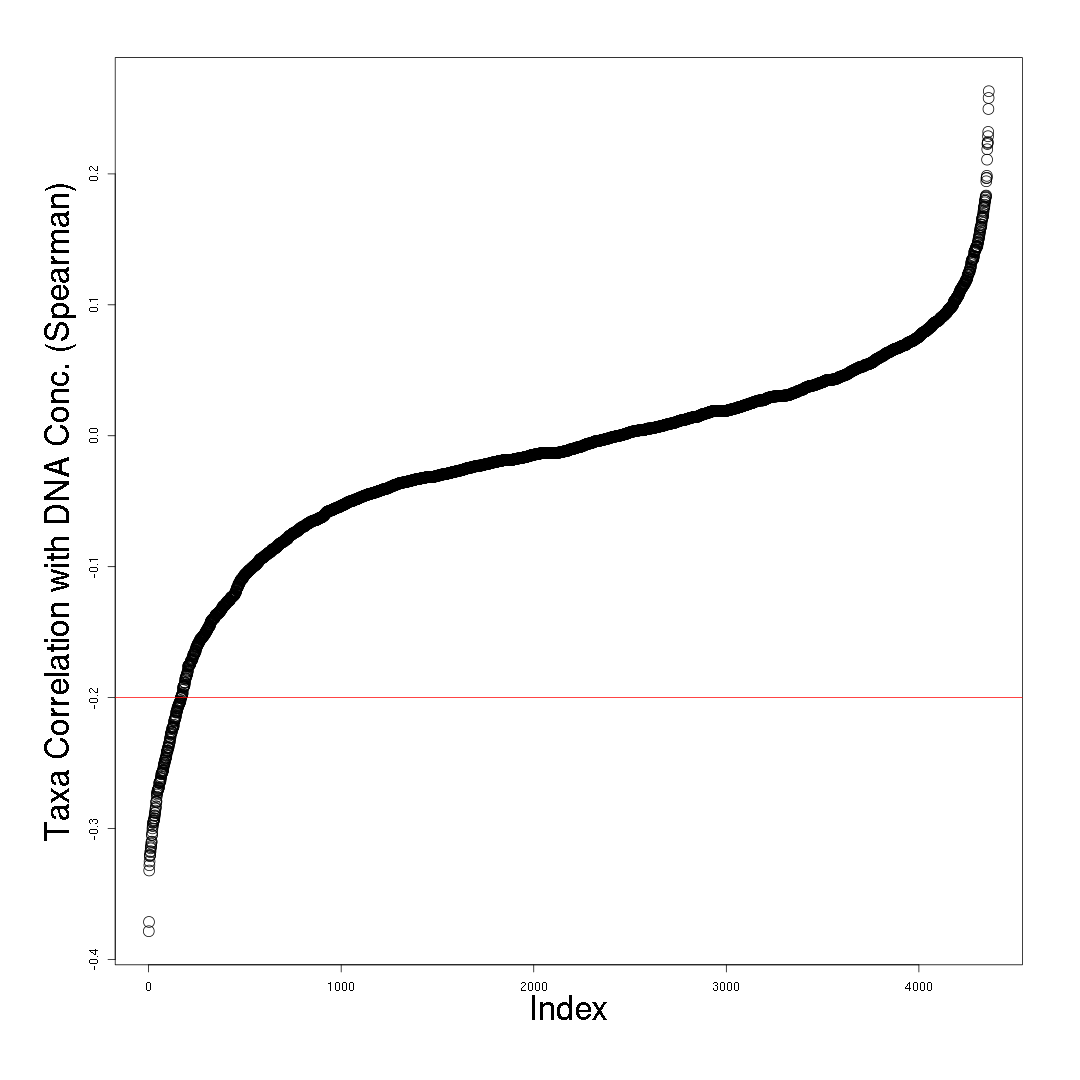

In [41]:
%%R -i taxa_rho -w 1080 -h 1080

par(mar=c(8, 8, 4, 4))
plot(sort(taxa_rho), ylab='Taxa Correlation with DNA Conc. (Spearman)', cex.lab=3, cex=2)
abline(h=-0.2, col='red')

In [42]:
import numpy as np

rands = pd.DataFrame(np.random.rand(taxa.shape[0], taxa.shape[1]), columns=taxa.columns, index=taxa.index)
rands = (rands.T / rands.sum(axis=1)).T
rands_rho = rands.corrwith(qc_mdata['library_QC_concentration'], axis=0, method='spearman')

rands.sum(axis=1).head()

uuid
sossowski_BarcelonaNov2018_CSD16-BCN-006-29787-ACTCGCTA-CTATTAAG    1.0
sossowski_BarcelonaNov2018_CSD16-BCN-070-29787-CGGAGCCT-AAGGCTAT    1.0
sossowski_BarcelonaNov2018_CSD16-BCN-132-29786-CGATCAGT-TTCTAGCT    1.0
haib17CEM4890_HKC32ALXX_SL254736                                    1.0
haib17CEM4890_HMCMJCCXY_SL335862                                    1.0
dtype: float64

In [43]:
%%R -i rands_rho -w 1080 -h 1080

par(mar=c(8, 8, 4, 4))
plot(sort(rands_rho), ylab='Random Compositional Correlation with DNA Conc. (Spearman)', cex.lab=3, cex=2)
abline(h=-0.2, col='red')


Error in plot.window(...) : need finite 'xlim' values


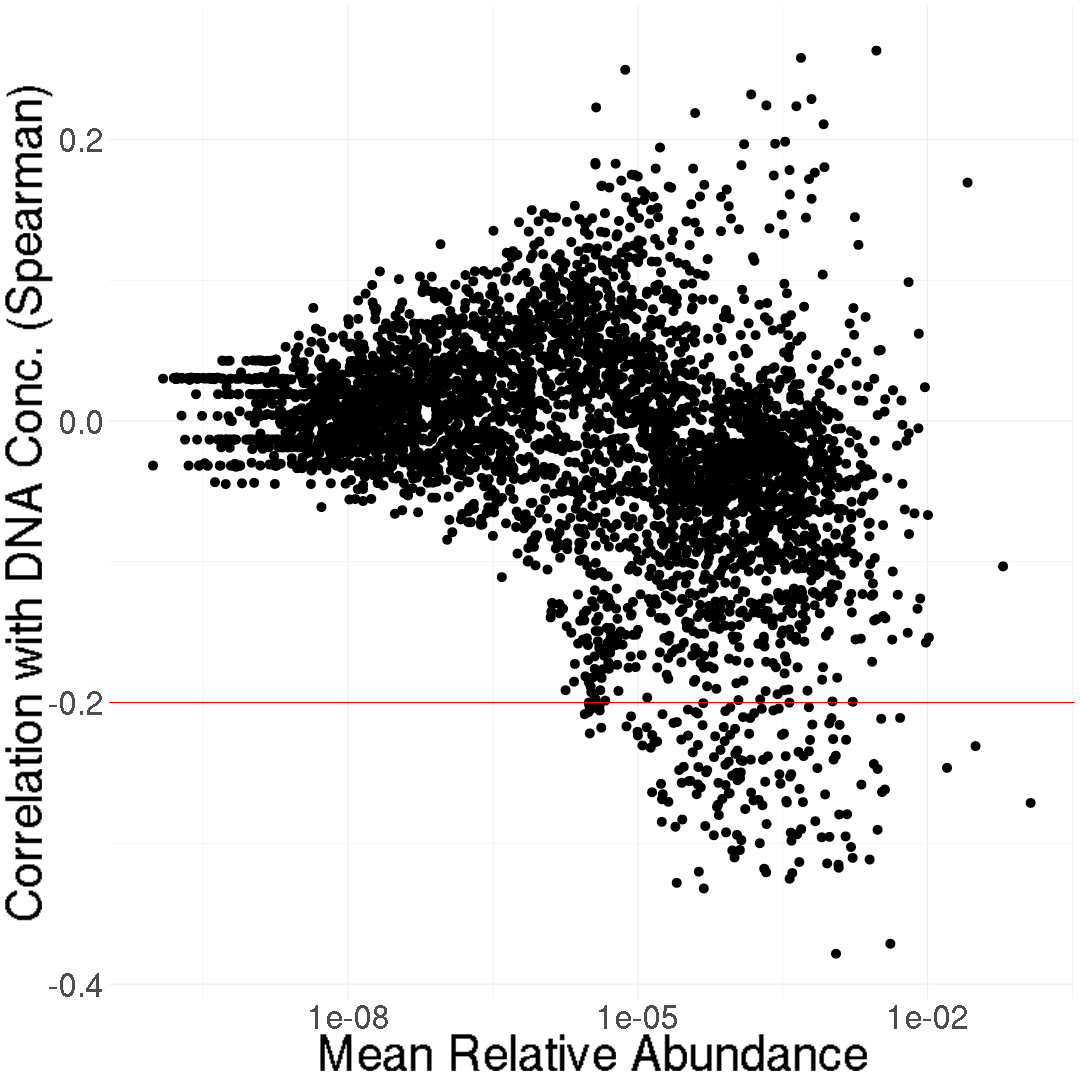

In [44]:
%%R -i taxa_qc -w 1080 -h 1080


ggplot(taxa_qc, aes(x=mean_abund, y=rho)) +
    geom_point(size=4) +
    theme_minimal() +
    ylab('Correlation with DNA Conc. (Spearman)') +
    xlab('Mean Relative Abundance') +
    scale_x_log10() +
    #scale_y_log10() +
    geom_hline(yintercept=-0.2, col='red') +
    theme(
        text = element_text(size=50),
        legend.position='right',
    )

In [45]:
bad_taxa = taxa_rho[taxa_rho < -0.2].index
bad_taxa = list(bad_taxa)

bad_genus = set([''.join(el.split()[0]) for el in bad_taxa])
print(len(bad_genus))
print(len(bad_taxa))

neg_taxa = set(['Salmonella enterica', 'Escherichia coli', 'Serratia marcescens',
       'Pseudomonas stutzeri', 'Pseudomonas aeruginosa', 'Pseudomonas putida',
       'Pseudomonas fluorescens', 'Stenotrophomonas sp. LM091',
       'Stenotrophomonas maltophilia', 'Bradyrhizobium sp. SK17',
       'Bradyrhizobium sp. BTAi1', 'Bradyrhizobium diazoefficiens',
       'Bradyrhizobium japonicum', 'Bradyrhizobium sp.',
       'Bradyrhizobium sp. CCGE-LA001', 'Bradyrhizobium sp. S23321',
       'Rhodopseudomonas palustris', 'Methylobacterium populi',
       'Ochrobactrum anthropi', 'Ochrobactrum sp. A44',
       'Ochrobactrum pseudogrignonense', 'Brevundimonas naejangsanensis',
       'Brevundimonas sp. DS20', 'Altererythrobacter marensis',
       'Achromobacter xylosoxidans', 'Janthinobacterium sp. 1_2014MBL_MicDiv',
       'Janthinobacterium svalbardensis', 'Janthinobacterium sp. LM6',
       'Cupriavidus metallidurans', 'Ralstonia pickettii', 'Bacillus subtilis',
       'Staphylococcus aureus', 'Staphylococcus hominis',
       'Staphylococcus epidermidis', 'Staphylococcus capitis',
       'Staphylococcus haemolyticus', 'Staphylococcus lugdunensis',
       'Listeria monocytogenes', 'Enterococcus faecium',
       'Enterococcus faecalis', 'Lactobacillus fermentum',
       'Streptococcus thermophilus', 'Lactococcus lactis',
       'Leuconostoc mesenteroides', 'Negativicoccus massiliensis',
       'Kocuria rhizophila', 'Micrococcus luteus', 'Rothia dentocariosa',
       'Microbacterium sp. PAMC 28756', 'Microbacterium sp. TPU 3598',
       'Janibacter indicus', 'Dermacoccus nishinomiyaensis',
       'Brevibacterium linens', 'Corynebacterium variabile',
       'Corynebacterium efficiens', 'Rhodococcus fascians',
       'Rhodococcus sp. PBTS 2', 'Rhodococcus erythropolis',
       'Cutibacterium acnes', 'Saccharomyces cerevisiae',
       'Enterococcus phage EF62phi'])
neg_taxa & set(bad_taxa)

60
168


{'Cutibacterium acnes',
 'Micrococcus luteus',
 'Rothia dentocariosa',
 'Streptococcus thermophilus'}

In [46]:
from scipy.stats import pearsonr

taxa_pearson = taxa.corrwith(qc_mdata['library_QC_concentration'], axis=0, method=pearsonr)
taxa_pearson = pd.DataFrame(taxa_pearson.tolist())
taxa_pearson = taxa_pearson.rename(columns={0: 'r', 1: 'p'})
taxa_qc2 = pd.concat([taxa_qc, taxa_pearson], axis=1)
taxa_pearson.head()


,r
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [47]:
%%R -i taxa_qc2 -w 1080 -h 1080

par(mar=c(8, 8, 4, 4))
plot(sort(taxa_qc2$p), ylab='Taxa Correlation with DNA Conc. (Spearman)', cex.lab=3, cex=2)
abline(h=-0.2, col='red')


Error in plot.window(...) : need finite 'xlim' values


In [49]:

def iscontrol(el):
    if el == 0:
        return 'Grey'
    if el in ['ctrl cities']:
        return 'Blue'
    if el in ['positive_control', 'poszymo']:
        return 'Green'
    if el in ['negative_control', 'dry tube', 'dry tube & swab', 'tube & rna/dna out', 'tube & rna/dna out & swab']:
        return 'Red'
    return 'Grey'



contams = core_tabler.csv_in_dir('other/probable_contamination_homology.csv')
control_type = core_tabler.metadata.loc[contams.index, 'control_type'].apply(iscontrol)
print(sum(control_type=='Grey'))
print(contams.shape)
contams.head()

141
(207, 38)


,Cutibacterium,Pseudomonas,Salmonella,Escherichia,Lactobacillus,Salmonella enterica,Staphylococcus,Bacillus,Enterobacteria,Pseudomonas aeruginosa,...,Bradyrhizobium oligotrophicum,bacterium,Homo,Pseudomonas stutzeri,Aeromonas,Micrococcus,Micrococcus luteus,Streptococcus oralis,Streptococcus,Neomicrococcus
haib17DB4959_H3MGVCCXY_SL259975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
haib17DB4959_H3MGVCCXY_SL259947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
haib18CEM5453_HNHKFCCXY_SL345503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
haib18CEM5453_HMC2KCCXY_SL336725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
haib18CEM5453_HT5YVCCXY_SL357528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


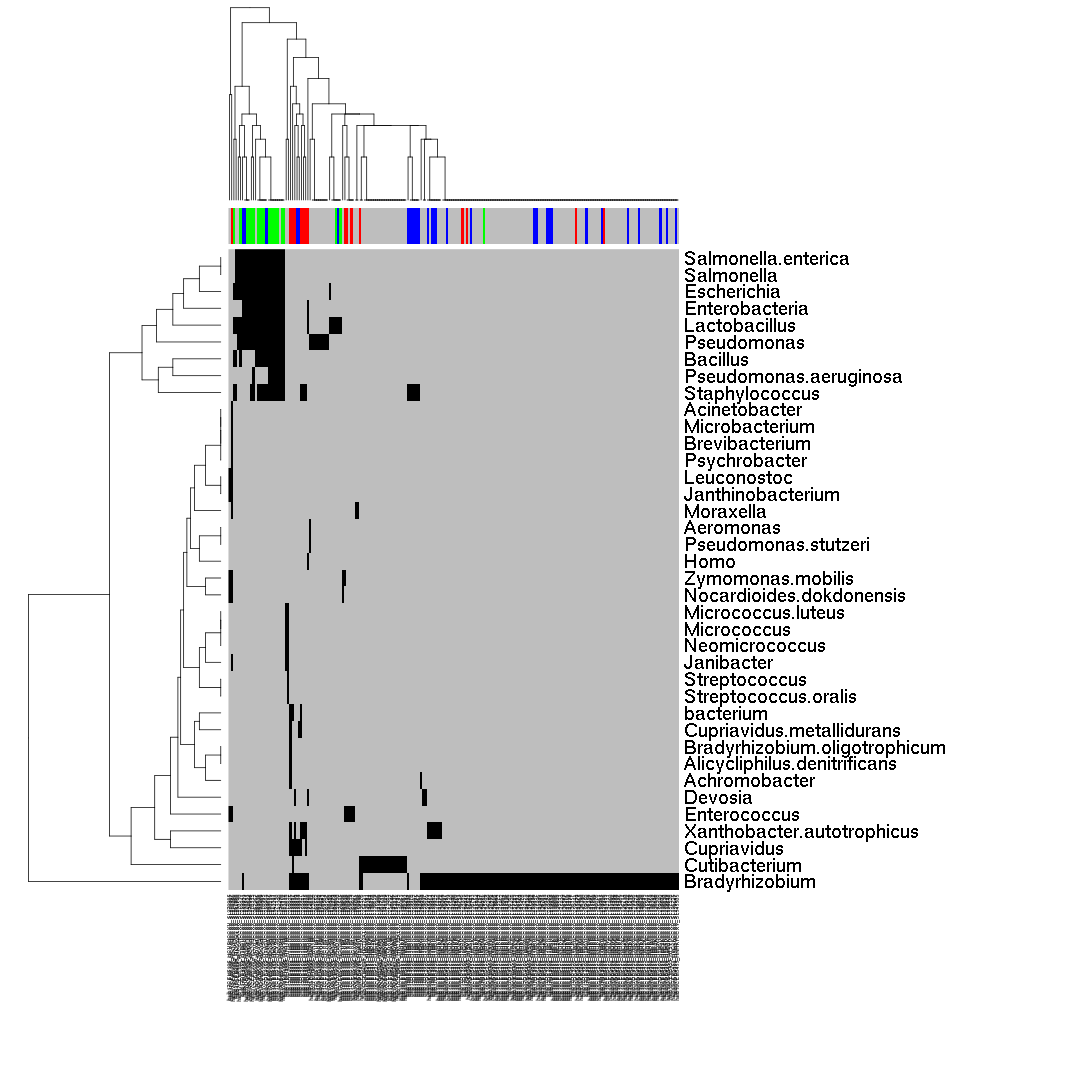

In [54]:
%%R -i contams -i control_type -w 1080 -h 1080

heatmap(t(as.matrix(contams)), scale='none', ColSideColors=control_type, col=c('grey', 'black'), cexRow=2.5, margins=c(20, 40))

In [23]:
contams.columns

Index(['Cutibacterium', 'Pseudomonas', 'Salmonella', 'Escherichia',
       'Lactobacillus', 'Salmonella enterica', 'Staphylococcus', 'Bacillus',
       'Enterobacteria', 'Pseudomonas aeruginosa', 'Moraxella',
       'Zymomonas mobilis', 'Nocardioides dokdonensis', 'Enterococcus',
       'Janthinobacterium', 'Leuconostoc', 'Microbacterium', 'Janibacter',
       'Acinetobacter', 'Brevibacterium', 'Psychrobacter', 'Bradyrhizobium',
       'Devosia', 'Xanthobacter autotrophicus', 'Cupriavidus',
       'Cupriavidus metallidurans', 'Alicycliphilus denitrificans',
       'Achromobacter', 'Bradyrhizobium oligotrophicum', 'bacterium', 'Homo'],
      dtype='object')